# Introduction

In this project, we aim to build a predictive model to determine whether a borrower will fully repay a loan or default (charged off), based on historical data provided by LendingClub.

This classification task has real-world implications for financial institutions, helping reduce default risk and improve lending decisions.

We'll go through a complete machine learning pipeline, including data preprocessing, exploratory analysis, model training, evaluation, and model persistence.




### Data Features
-----
There are many LendingClub data sets on Kaggle. Here is the information on this particular data set:

<table border="1" class="dataframe">
  <thead>
    <tr style="text-align: right;">
      <th></th>
      <th>LoanStatNew</th>
      <th>Description</th>
    </tr>
  </thead>
  <tbody>
    <tr>
      <th>0</th>
      <td>loan_amnt</td>
      <td>The listed amount of the loan applied for by the borrower. If at some point in time, the credit department reduces the loan amount, then it will be reflected in this value.</td>
    </tr>
    <tr>
      <th>1</th>
      <td>term</td>
      <td>The number of payments on the loan. Values are in months and can be either 36 or 60.</td>
    </tr>
    <tr>
      <th>2</th>
      <td>int_rate</td>
      <td>Interest Rate on the loan</td>
    </tr>
    <tr>
      <th>3</th>
      <td>installment</td>
      <td>The monthly payment owed by the borrower if the loan originates.</td>
    </tr>
    <tr>
      <th>4</th>
      <td>grade</td>
      <td>LC assigned loan grade</td>
    </tr>
    <tr>
      <th>5</th>
      <td>sub_grade</td>
      <td>LC assigned loan subgrade</td>
    </tr>
    <tr>
      <th>6</th>
      <td>emp_title</td>
      <td>The job title supplied by the Borrower when applying for the loan.*</td>
    </tr>
    <tr>
      <th>7</th>
      <td>emp_length</td>
      <td>Employment length in years. Possible values are between 0 and 10 where 0 means less than one year and 10 means ten or more years.</td>
    </tr>
    <tr>
      <th>8</th>
      <td>home_ownership</td>
      <td>The home ownership status provided by the borrower during registration or obtained from the credit report. Our values are: RENT, OWN, MORTGAGE, OTHER</td>
    </tr>
    <tr>
      <th>9</th>
      <td>annual_inc</td>
      <td>The self-reported annual income provided by the borrower during registration.</td>
    </tr>
    <tr>
      <th>10</th>
      <td>verification_status</td>
      <td>Indicates if income was verified by LC, not verified, or if the income source was verified</td>
    </tr>
    <tr>
      <th>11</th>
      <td>issue_d</td>
      <td>The month which the loan was funded</td>
    </tr>
    <tr>
      <th>12</th>
      <td>loan_status</td>
      <td>Current status of the loan</td>
    </tr>
    <tr>
      <th>13</th>
      <td>purpose</td>
      <td>A category provided by the borrower for the loan request.</td>
    </tr>
    <tr>
      <th>14</th>
      <td>title</td>
      <td>The loan title provided by the borrower</td>
    </tr>
    <tr>
      <th>15</th>
      <td>zip_code</td>
      <td>The first 3 numbers of the zip code provided by the borrower in the loan application.</td>
    </tr>
    <tr>
      <th>16</th>
      <td>addr_state</td>
      <td>The state provided by the borrower in the loan application</td>
    </tr>
    <tr>
      <th>17</th>
      <td>dti</td>
      <td>A ratio calculated using the borrower’s total monthly debt payments on the total debt obligations, excluding mortgage and the requested LC loan, divided by the borrower’s self-reported monthly income.</td>
    </tr>
    <tr>
      <th>18</th>
      <td>earliest_cr_line</td>
      <td>The month the borrower's earliest reported credit line was opened</td>
    </tr>
    <tr>
      <th>19</th>
      <td>open_acc</td>
      <td>The number of open credit lines in the borrower's credit file.</td>
    </tr>
    <tr>
      <th>20</th>
      <td>pub_rec</td>
      <td>Number of derogatory public records</td>
    </tr>
    <tr>
      <th>21</th>
      <td>revol_bal</td>
      <td>Total credit revolving balance</td>
    </tr>
    <tr>
      <th>22</th>
      <td>revol_util</td>
      <td>Revolving line utilization rate, or the amount of credit the borrower is using relative to all available revolving credit.</td>
    </tr>
    <tr>
      <th>23</th>
      <td>total_acc</td>
      <td>The total number of credit lines currently in the borrower's credit file</td>
    </tr>
    <tr>
      <th>24</th>
      <td>initial_list_status</td>
      <td>The initial listing status of the loan. Possible values are – W, F</td>
    </tr>
    <tr>
      <th>25</th>
      <td>application_type</td>
      <td>Indicates whether the loan is an individual application or a joint application with two co-borrowers</td>
    </tr>
    <tr>
      <th>26</th>
      <td>mort_acc</td>
      <td>Number of mortgage accounts.</td>
    </tr>
    <tr>
      <th>27</th>
      <td>pub_rec_bankruptcies</td>
      <td>Number of public record bankruptcies</td>
    </tr>
  </tbody>
</table>

----

# Section 1: Data Loading

In this section, we load the LendingClub dataset and conduct a quick overview of the data structure.

Steps:
- Import necessary libraries
- Load the dataset into a Pandas DataFrame
- Display dataset shape and column information
- Preview the first few rows

In [1]:
import pandas as pd
import numpy as np 
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline

In [2]:
df = pd.read_csv('data/lending_club_loan_data.csv')
df.head(5)

,loan_amnt,term,int_rate,installment,grade,sub_grade,emp_title,emp_length,home_ownership,annual_inc,...,open_acc,pub_rec,revol_bal,revol_util,total_acc,initial_list_status,application_type,mort_acc,pub_rec_bankruptcies,address
0,10000.0,36 months,11.44,329.48,B,B4,Marketing,10+ years,RENT,117000.0,...,16.0,0.0,36369.0,41.8,25.0,w,INDIVIDUAL,0.0,0.0,"0174 Michelle Gateway\nMendozaberg, OK 22690"
1,8000.0,36 months,11.99,265.68,B,B5,Credit analyst,4 years,MORTGAGE,65000.0,...,17.0,0.0,20131.0,53.3,27.0,f,INDIVIDUAL,3.0,0.0,"1076 Carney Fort Apt. 347\nLoganmouth, SD 05113"
2,15600.0,36 months,10.49,506.97,B,B3,Statistician,< 1 year,RENT,43057.0,...,13.0,0.0,11987.0,92.2,26.0,f,INDIVIDUAL,0.0,0.0,"87025 Mark Dale Apt. 269\nNew Sabrina, WV 05113"
3,7200.0,36 months,6.49,220.65,A,A2,Client Advocate,6 years,RENT,54000.0,...,6.0,0.0,5472.0,21.5,13.0,f,INDIVIDUAL,0.0,0.0,"823 Reid Ford\nDelacruzside, MA 00813"
4,24375.0,60 months,17.27,609.33,C,C5,Destiny Management Inc.,9 years,MORTGAGE,55000.0,...,13.0,0.0,24584.0,69.8,43.0,f,INDIVIDUAL,1.0,0.0,"679 Luna Roads\nGreggshire, VA 11650"


In [3]:
df.info() 

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 396030 entries, 0 to 396029
Data columns (total 27 columns):
 #   Column                Non-Null Count   Dtype  
---  ------                --------------   -----  
 0   loan_amnt             396030 non-null  float64
 1   term                  396030 non-null  object 
 2   int_rate              396030 non-null  float64
 3   installment           396030 non-null  float64
 4   grade                 396030 non-null  object 
 5   sub_grade             396030 non-null  object 
 6   emp_title             373103 non-null  object 
 7   emp_length            377729 non-null  object 
 8   home_ownership        396030 non-null  object 
 9   annual_inc            396030 non-null  float64
 10  verification_status   396030 non-null  object 
 11  issue_d               396030 non-null  object 
 12  loan_status           396030 non-null  object 
 13  purpose               396030 non-null  object 
 14  title                 394274 non-null  object 
 15  

In [4]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
loan_amnt,396030.0,14113.888089,8357.441341,500.00,8000.00,12000.00,20000.00,40000.00
int_rate,396030.0,13.639400,4.472157,5.32,10.49,13.33,16.49,30.99
installment,396030.0,431.849698,250.727790,16.08,250.33,375.43,567.30,1533.81
annual_inc,396030.0,74203.175798,61637.621158,0.00,45000.00,64000.00,90000.00,8706582.00
dti,396030.0,17.379514,18.019092,0.00,11.28,16.91,22.98,9999.00
open_acc,396030.0,11.311153,5.137649,0.00,8.00,10.00,14.00,90.00
pub_rec,396030.0,0.178191,0.530671,0.00,0.00,0.00,0.00,86.00
revol_bal,396030.0,15844.539853,20591.836109,0.00,6025.00,11181.00,19620.00,1743266.00
revol_util,395754.0,53.791749,24.452193,0.00,35.80,54.80,72.90,892.30
total_acc,396030.0,25.414744,11.886991,2.00,17.00,24.00,32.00,151.00


# Section 2: Exploratory Data Analysis (EDA)

EDA helps uncover trends, patterns, and relationships in the data.

In this section, we:
- Visualize class imbalance between loan statuses
- Explore distributions of numerical and categorical features
- Analyze correlations with the target variable (`loan_status`)
- Identify potential features for modeling

**create a countplot of the (`loan_status`) column.**

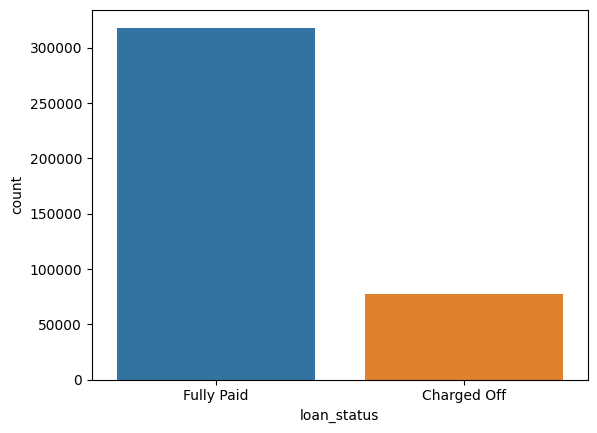

In [5]:
sns.countplot(x='loan_status',data=df,hue='loan_status',legend=False)
plt.savefig("plots/CountPlot_of_LoanStatus.png", dpi=300, bbox_inches='tight')

**Create a histogram of the (`loan_amnt`) column.**

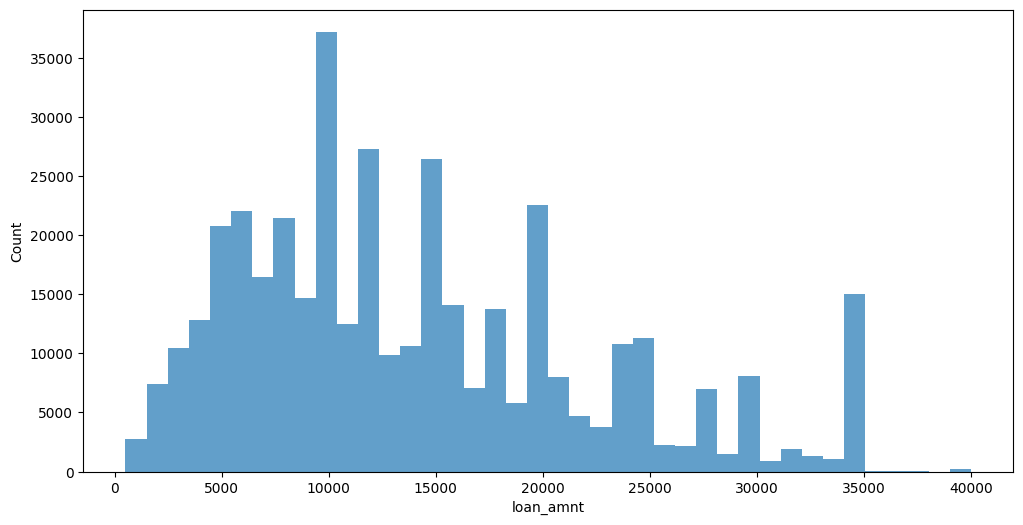

In [6]:
plt.figure(figsize=(12,6))  
sns.histplot(df['loan_amnt'], bins=40, edgecolor=None, alpha=0.7)
plt.savefig("plots/Hits_Count_Histplot_of_LoanAmount.png", dpi=300, bbox_inches='tight')

**Correlation between all continuous numeric variables using .corr() method.**

In [7]:
df.corr(numeric_only=True)

,loan_amnt,int_rate,installment,annual_inc,dti,open_acc,pub_rec,revol_bal,revol_util,total_acc,mort_acc,pub_rec_bankruptcies
loan_amnt,1.000000,0.168921,0.953929,0.336887,0.016636,0.198556,-0.077779,0.328320,0.099911,0.223886,0.222315,-0.106539
int_rate,0.168921,1.000000,0.162758,-0.056771,0.079038,0.011649,0.060986,-0.011280,0.293659,-0.036404,-0.082583,0.057450
installment,0.953929,0.162758,1.000000,0.330381,0.015786,0.188973,-0.067892,0.316455,0.123915,0.202430,0.193694,-0.098628
annual_inc,0.336887,-0.056771,0.330381,1.000000,-0.081685,0.136150,-0.013720,0.299773,0.027871,0.193023,0.236320,-0.050162
dti,0.016636,0.079038,0.015786,-0.081685,1.000000,0.136181,-0.017639,0.063571,0.088375,0.102128,-0.025439,-0.014558
open_acc,0.198556,0.011649,0.188973,0.136150,0.136181,1.000000,-0.018392,0.221192,-0.131420,0.680728,0.109205,-0.027732
pub_rec,-0.077779,0.060986,-0.067892,-0.013720,-0.017639,-0.018392,1.000000,-0.101664,-0.075910,0.019723,0.011552,0.699408
revol_bal,0.328320,-0.011280,0.316455,0.299773,0.063571,0.221192,-0.101664,1.000000,0.226346,0.191616,0.194925,-0.124532
revol_util,0.099911,0.293659,0.123915,0.027871,0.088375,-0.131420,-0.075910,0.226346,1.000000,-0.104273,0.007514,-0.086751
total_acc,0.223886,-0.036404,0.202430,0.193023,0.102128,0.680728,0.019723,0.191616,-0.104273,1.000000,0.381072,0.042035


**Visualize using a heatmap**

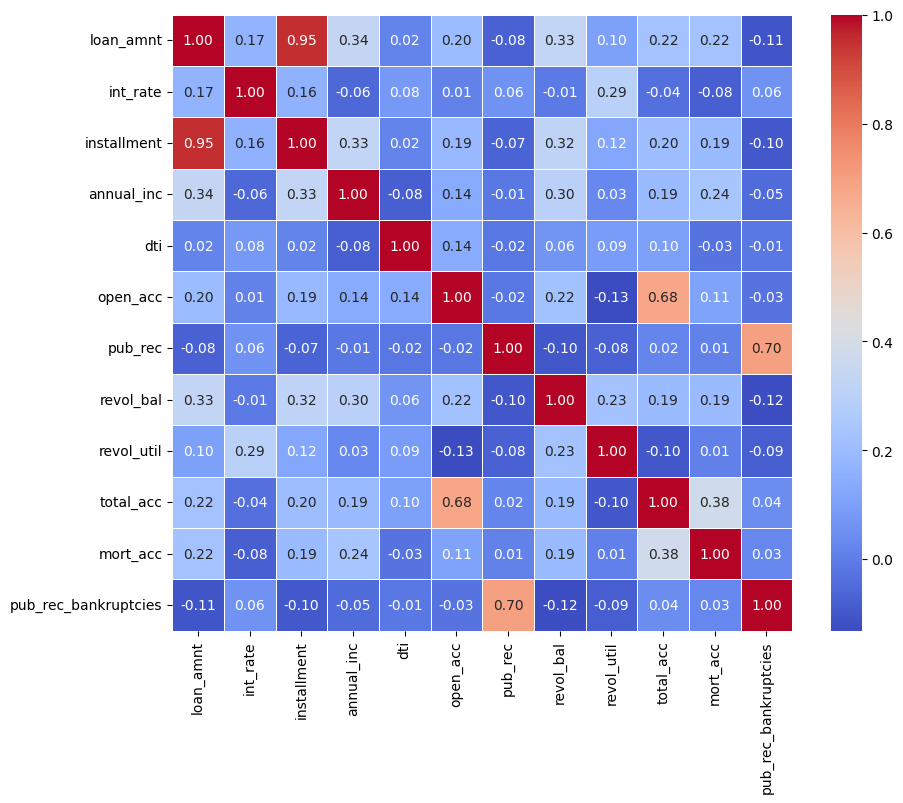

In [8]:
corr_df=df.corr(numeric_only=True)
plt.figure(figsize=(10, 8)) 
sns.heatmap(corr_df, annot=True, cmap='coolwarm', fmt='.2f', linewidths=0.5)
plt.savefig("plots/Heatmap_of_Corr.png", dpi=300, bbox_inches='tight')

**We have noticed almost perfect correlation with the (`installment`) feature. So we must explore this feature more**

In [9]:
print(df['loan_amnt'].describe())
print("\n")
print(df['installment'].describe())

count    396030.000000
mean      14113.888089
std        8357.441341
min         500.000000
25%        8000.000000
50%       12000.000000
75%       20000.000000
max       40000.000000
Name: loan_amnt, dtype: float64


count    396030.000000
mean        431.849698
std         250.727790
min          16.080000
25%         250.330000
50%         375.430000
75%         567.300000
max        1533.810000
Name: installment, dtype: float64


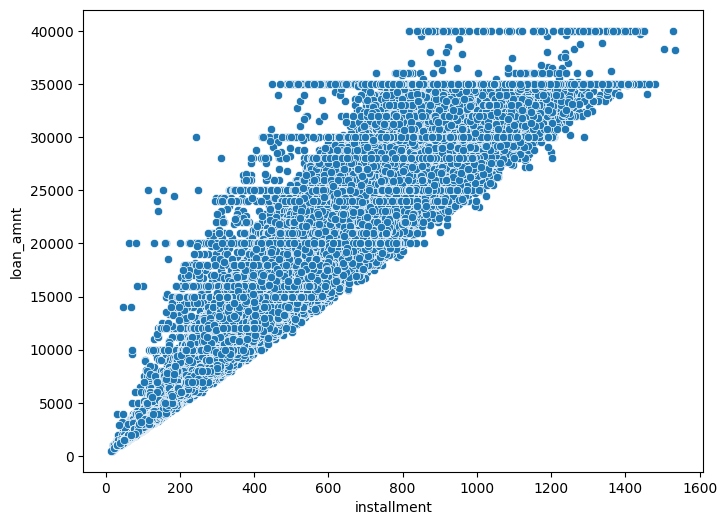

In [10]:
plt.figure(figsize=(8,6))
sns.scatterplot(x='installment', y='loan_amnt', data=df)
plt.savefig("plots/Scatterplot_of_Installment_vs_LoanAmount.png", dpi=300, bbox_inches='tight')

**Create a boxplot showing the relationship between the (`loan_status`) and the (`loan_amnt`).**

C:\Users\User\AppData\Local\Temp\ipykernel_3852\4126423939.py:1: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='loan_status', y='loan_amnt', data=df, palette='Set1')


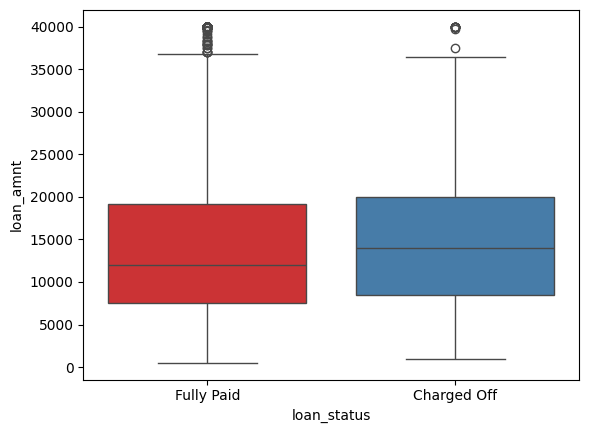

In [11]:
sns.boxplot(x='loan_status', y='loan_amnt', data=df, palette='Set1')
plt.savefig("plots/Boxplot_of_LoanStatus_vs_Loanamount.png", dpi=300, bbox_inches='tight')

**Calculate the summary statistics for the loan amount, grouped by the loan_status.**

In [12]:
df['loan_amnt'].groupby(df['loan_status']).describe()

,count,mean,std,min,25%,50%,75%,max
loan_status,,,,,,,,
Charged Off,77673.0,15126.300967,8505.090557,1000.0,8525.0,14000.0,20000.0,40000.0
Fully Paid,318357.0,13866.878771,8302.319699,500.0,7500.0,12000.0,19225.0,40000.0


**Now let's explore the Grade and SubGrade columns that LendingClub attributes to the loans.**

In [13]:
grades=df['grade'].to_numpy()
grades = np.array(sorted(set(grades)))  
grades

array(['A', 'B', 'C', 'D', 'E', 'F', 'G'], dtype='<U1')

In [14]:
sub_grades=df['sub_grade'].to_numpy()
sub_grades = np.array(sorted(set(sub_grades)))  
sub_grades

array(['A1', 'A2', 'A3', 'A4', 'A5', 'B1', 'B2', 'B3', 'B4', 'B5', 'C1',
       'C2', 'C3', 'C4', 'C5', 'D1', 'D2', 'D3', 'D4', 'D5', 'E1', 'E2',
       'E3', 'E4', 'E5', 'F1', 'F2', 'F3', 'F4', 'F5', 'G1', 'G2', 'G3',
       'G4', 'G5'], dtype='<U2')

**Create a countplot per (`grade`) column.**

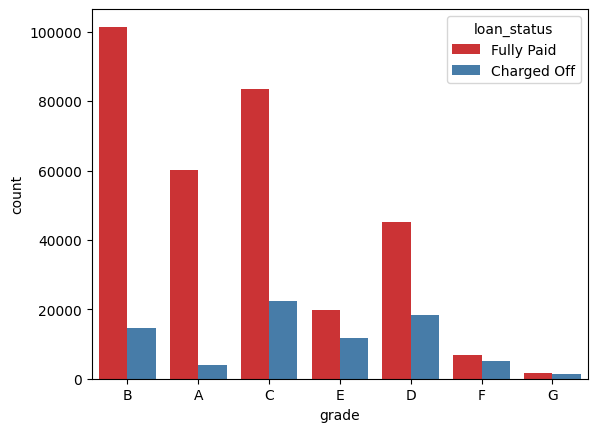

In [15]:
sns.countplot(x='grade', data=df,hue='loan_status', palette='Set1')
plt.savefig("plots/Countplot_of_Grade.png", dpi=300, bbox_inches='tight')

**Create a count plot per (`sub_grade`)**

C:\Users\User\AppData\Local\Temp\ipykernel_3852\3979733312.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='sub_grade', data=df,palette='coolwarm',order=sub_grades)


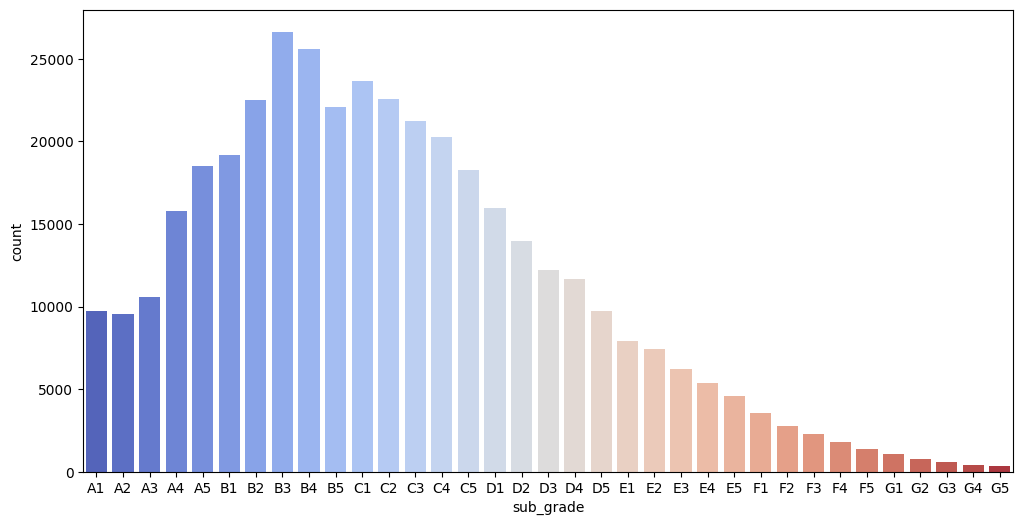

In [16]:
plt.figure(figsize=(12,6))
sns.countplot(x='sub_grade', data=df,palette='coolwarm',order=sub_grades)
plt.savefig("plots/Countplot_of_SubGrade.png", dpi=300, bbox_inches='tight')

**Create a count plot per (`sub_grade`), but here we will use hue as (`loan_status`) to compare**

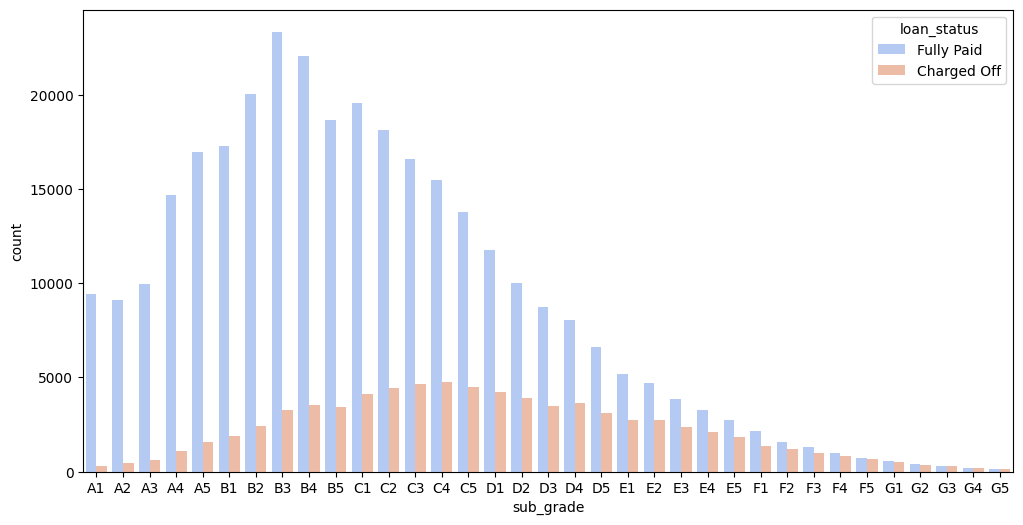

In [17]:
plt.figure(figsize=(12,6))
sns.countplot(x='sub_grade', data=df,palette='coolwarm',order=sub_grades, hue='loan_status')
plt.savefig("plots/Countplot_of_SubGrade_w_hue_LoanStatus.png", dpi=300, bbox_inches='tight')

# Section 3: Feature Engineering and Data PreProcessing

Here we transform the data into a format suitable for machine learning algorithms.

Steps include:
- Encoding categorical variables (e.g., one-hot encoding)
- Scaling or normalizing numerical features
- Creating new features (e.g., interaction terms or flag variables)
- Removing highly correlated or irrelevant features
- Identify and handle missing values
- Drop irrelevant or redundant columns
- Ensure correct data types
- Remove duplicate rows (if any)

**Now, We will create a new column called (`loan_repaid`) which will contain a 1 if the (`loan_status`) was "Fully Paid" and a 0 if it was "Charged Off".**

In [18]:
status=df['loan_status'].to_numpy()
status = np.array(sorted(set(status)))  
status

array(['Charged Off', 'Fully Paid'], dtype='<U11')

In [19]:
def ispaid(x):
    if x=="Fully Paid":
        return 1
    return 0

In [20]:
df['loan_repaid'] = df['loan_status'].apply(ispaid)

In [21]:
df[['loan_status', 'loan_repaid']]


,loan_status,loan_repaid
0,Fully Paid,1
1,Fully Paid,1
2,Fully Paid,1
3,Fully Paid,1
4,Charged Off,0
...,...,...
396025,Fully Paid,1
396026,Fully Paid,1
396027,Fully Paid,1
396028,Fully Paid,1


**Create a bar plot showing the correlation of the numeric features to the new (`loan_repaid`) column.**

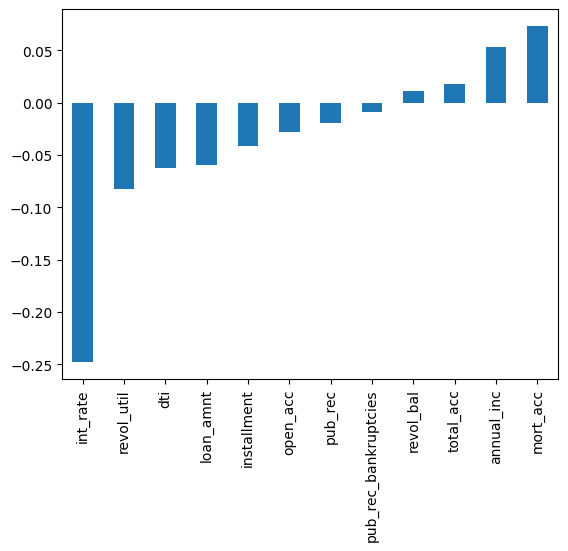

In [22]:
df.corr(numeric_only=True)['loan_repaid'].drop('loan_repaid').dropna().sort_values().plot(kind='bar')
plt.savefig("plots/Barplot_of_Corr_with_LoanRepaid.png", dpi=300, bbox_inches='tight')

**Our new Data**

In [23]:
df.head(5)

,loan_amnt,term,int_rate,installment,grade,sub_grade,emp_title,emp_length,home_ownership,annual_inc,...,pub_rec,revol_bal,revol_util,total_acc,initial_list_status,application_type,mort_acc,pub_rec_bankruptcies,address,loan_repaid
0,10000.0,36 months,11.44,329.48,B,B4,Marketing,10+ years,RENT,117000.0,...,0.0,36369.0,41.8,25.0,w,INDIVIDUAL,0.0,0.0,"0174 Michelle Gateway\nMendozaberg, OK 22690",1
1,8000.0,36 months,11.99,265.68,B,B5,Credit analyst,4 years,MORTGAGE,65000.0,...,0.0,20131.0,53.3,27.0,f,INDIVIDUAL,3.0,0.0,"1076 Carney Fort Apt. 347\nLoganmouth, SD 05113",1
2,15600.0,36 months,10.49,506.97,B,B3,Statistician,< 1 year,RENT,43057.0,...,0.0,11987.0,92.2,26.0,f,INDIVIDUAL,0.0,0.0,"87025 Mark Dale Apt. 269\nNew Sabrina, WV 05113",1
3,7200.0,36 months,6.49,220.65,A,A2,Client Advocate,6 years,RENT,54000.0,...,0.0,5472.0,21.5,13.0,f,INDIVIDUAL,0.0,0.0,"823 Reid Ford\nDelacruzside, MA 00813",1
4,24375.0,60 months,17.27,609.33,C,C5,Destiny Management Inc.,9 years,MORTGAGE,55000.0,...,0.0,24584.0,69.8,43.0,f,INDIVIDUAL,1.0,0.0,"679 Luna Roads\nGreggshire, VA 11650",0


### Missing Data

**Let's explore this missing data columns. We use a variety of factors to decide whether or not they would be useful, to see if we should keep, discard, or fill in the missing data.**

In [24]:
len(df)

396030

**Create a Series that displays the total count of missing values per column.**

In [25]:
total_count= df.isnull().sum()
total_count

loan_amnt                   0
term                        0
int_rate                    0
installment                 0
grade                       0
sub_grade                   0
emp_title               22927
emp_length              18301
home_ownership              0
annual_inc                  0
verification_status         0
issue_d                     0
loan_status                 0
purpose                     0
title                    1756
dti                         0
earliest_cr_line            0
open_acc                    0
pub_rec                     0
revol_bal                   0
revol_util                276
total_acc                   0
initial_list_status         0
application_type            0
mort_acc                37795
pub_rec_bankruptcies      535
address                     0
loan_repaid                 0
dtype: int64

**We check missing data based on the total count of data.**

In [26]:
total_count = (total_count / len(df)) * 100
total_count

loan_amnt               0.000000
term                    0.000000
int_rate                0.000000
installment             0.000000
grade                   0.000000
sub_grade               0.000000
emp_title               5.789208
emp_length              4.621115
home_ownership          0.000000
annual_inc              0.000000
verification_status     0.000000
issue_d                 0.000000
loan_status             0.000000
purpose                 0.000000
title                   0.443401
dti                     0.000000
earliest_cr_line        0.000000
open_acc                0.000000
pub_rec                 0.000000
revol_bal               0.000000
revol_util              0.069692
total_acc               0.000000
initial_list_status     0.000000
application_type        0.000000
mort_acc                9.543469
pub_rec_bankruptcies    0.135091
address                 0.000000
loan_repaid             0.000000
dtype: float64

***We will cover the missing data in each feature by itself and do the best approuch we can inorder to get better outputs***

**We check how many unique employment job titles are there**

In [27]:
df['emp_title'].nunique()

173105

In [28]:
df['emp_title'].value_counts()

emp_title
Teacher                         4389
Manager                         4250
Registered Nurse                1856
RN                              1846
Supervisor                      1830
                                ... 
Social Work/Care Manager           1
Regional Counsel                   1
Nor-Com Inc                        1
Director of the Bach Society       1
SPO II                             1
Name: count, Length: 173105, dtype: int64

**There are no options to do to save this feature, we cannot convert it to dummy variables due to the large number of different values, so the bewst solution is to drop it**

In [29]:
df.drop(columns=['emp_title'], inplace=True)

In [30]:
df.head(5)

,loan_amnt,term,int_rate,installment,grade,sub_grade,emp_length,home_ownership,annual_inc,verification_status,...,pub_rec,revol_bal,revol_util,total_acc,initial_list_status,application_type,mort_acc,pub_rec_bankruptcies,address,loan_repaid
0,10000.0,36 months,11.44,329.48,B,B4,10+ years,RENT,117000.0,Not Verified,...,0.0,36369.0,41.8,25.0,w,INDIVIDUAL,0.0,0.0,"0174 Michelle Gateway\nMendozaberg, OK 22690",1
1,8000.0,36 months,11.99,265.68,B,B5,4 years,MORTGAGE,65000.0,Not Verified,...,0.0,20131.0,53.3,27.0,f,INDIVIDUAL,3.0,0.0,"1076 Carney Fort Apt. 347\nLoganmouth, SD 05113",1
2,15600.0,36 months,10.49,506.97,B,B3,< 1 year,RENT,43057.0,Source Verified,...,0.0,11987.0,92.2,26.0,f,INDIVIDUAL,0.0,0.0,"87025 Mark Dale Apt. 269\nNew Sabrina, WV 05113",1
3,7200.0,36 months,6.49,220.65,A,A2,6 years,RENT,54000.0,Not Verified,...,0.0,5472.0,21.5,13.0,f,INDIVIDUAL,0.0,0.0,"823 Reid Ford\nDelacruzside, MA 00813",1
4,24375.0,60 months,17.27,609.33,C,C5,9 years,MORTGAGE,55000.0,Verified,...,0.0,24584.0,69.8,43.0,f,INDIVIDUAL,1.0,0.0,"679 Luna Roads\nGreggshire, VA 11650",0


**Create a count plot of the (`emp_length`) feature column.**

In [31]:
df['emp_length'].unique()

array(['10+ years', '4 years', '< 1 year', '6 years', '9 years',
       '2 years', '3 years', '8 years', '7 years', '5 years', '1 year',
       nan], dtype=object)

In [32]:
order = ['< 1 year', '1 year', '2 years', '3 years','4 years','5 years','6 years','7 years','8 years', '9 years','10+ years']
order


['< 1 year',
 '1 year',
 '2 years',
 '3 years',
 '4 years',
 '5 years',
 '6 years',
 '7 years',
 '8 years',
 '9 years',
 '10+ years']

C:\Users\User\AppData\Local\Temp\ipykernel_3852\786979476.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='emp_length', data=df, order=order, palette='Set1')


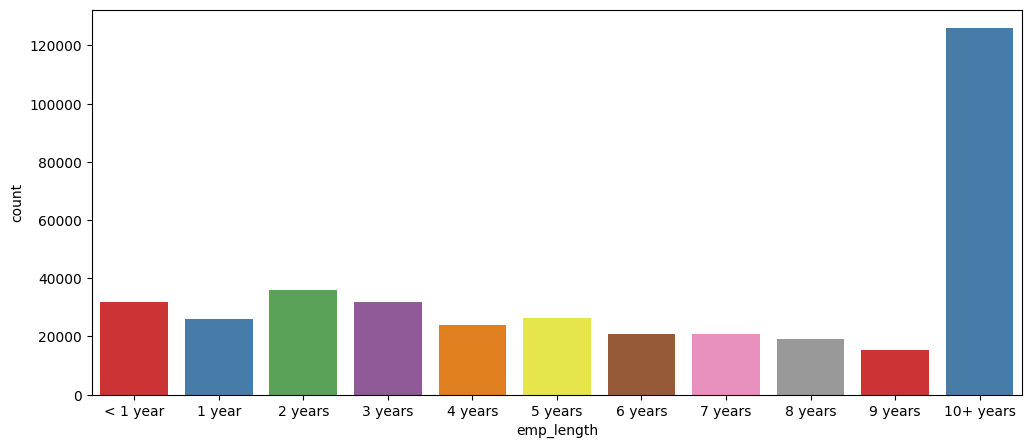

In [33]:
plt.figure(figsize=(12,5))
sns.countplot(x='emp_length', data=df, order=order, palette='Set1')
plt.savefig("plots/Countplot_of_EmpLength.png", dpi=300, bbox_inches='tight')

**Plot out the countplot with a hue separating Fully Paid vs Charged Off**

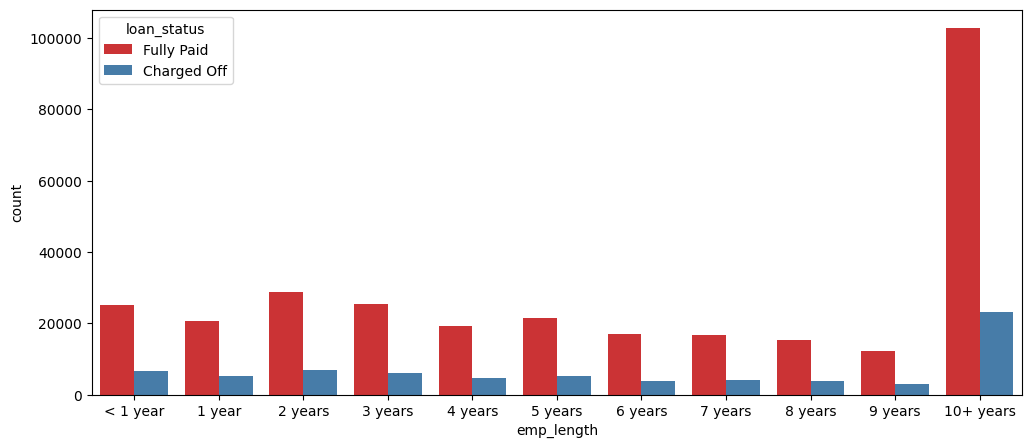

In [34]:
plt.figure(figsize=(12,5))
sns.countplot(x='emp_length', data=df, order=order,hue='loan_status', palette='Set1')
plt.savefig("plots/Countplot_of_EmpLength_w_hue_LoanStatus.png", dpi=300, bbox_inches='tight')

**This still doesn't really inform us if there is a strong relationship between employment length and being charged off, what we want is the percentage of charge offs per category. Essentially informing us what percent of people per employment category didn't pay back their loan. There are a multitude of ways to create this Series.**

In [35]:
emp_co = df[df['loan_status']=="Charged Off"]['emp_length'].value_counts()
emp_co

emp_length
10+ years    23215
2 years       6924
< 1 year      6563
3 years       6182
1 year        5154
5 years       5092
4 years       4608
7 years       4055
6 years       3943
8 years       3829
9 years       3070
Name: count, dtype: int64

In [36]:
emp_fp = df[df['loan_status']=="Fully Paid"]['emp_length'].value_counts()
emp_fp


emp_length
10+ years    102826
2 years       28903
3 years       25483
< 1 year      25162
5 years       21403
1 year        20728
4 years       19344
6 years       16898
7 years       16764
8 years       15339
9 years       12244
Name: count, dtype: int64

In [37]:
per_cat=emp_co/emp_fp
per_cat

emp_length
1 year       0.248649
10+ years    0.225770
2 years      0.239560
3 years      0.242593
4 years      0.238213
5 years      0.237911
6 years      0.233341
7 years      0.241887
8 years      0.249625
9 years      0.250735
< 1 year     0.260830
Name: count, dtype: float64

C:\Users\User\AppData\Local\Temp\ipykernel_3852\996746801.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(per_cat, palette='Set1')


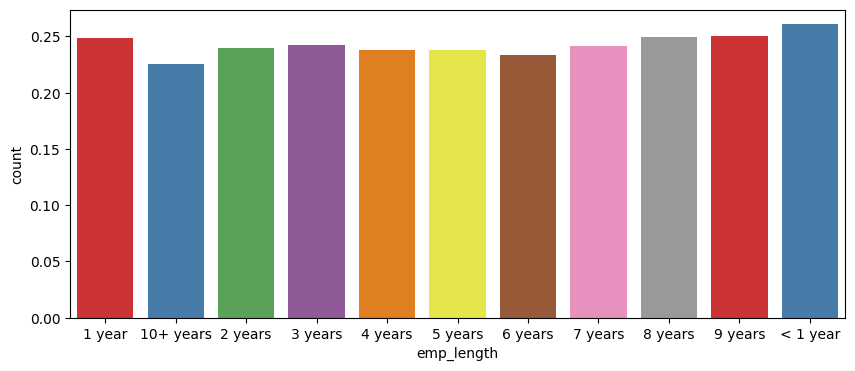

In [38]:
plt.figure(figsize=(10,4))
sns.barplot(per_cat, palette='Set1')
plt.savefig("plots/Countplot_of_Emplength_w_per_cat.png", dpi=300, bbox_inches='tight')

***Charge off rates are extremely similar across all employment lengths, so we will drop the (`emp_length`)column.***

In [39]:
df.drop(columns=['emp_length'], inplace=True)

In [40]:
df.head(5)

,loan_amnt,term,int_rate,installment,grade,sub_grade,home_ownership,annual_inc,verification_status,issue_d,...,pub_rec,revol_bal,revol_util,total_acc,initial_list_status,application_type,mort_acc,pub_rec_bankruptcies,address,loan_repaid
0,10000.0,36 months,11.44,329.48,B,B4,RENT,117000.0,Not Verified,Jan-2015,...,0.0,36369.0,41.8,25.0,w,INDIVIDUAL,0.0,0.0,"0174 Michelle Gateway\nMendozaberg, OK 22690",1
1,8000.0,36 months,11.99,265.68,B,B5,MORTGAGE,65000.0,Not Verified,Jan-2015,...,0.0,20131.0,53.3,27.0,f,INDIVIDUAL,3.0,0.0,"1076 Carney Fort Apt. 347\nLoganmouth, SD 05113",1
2,15600.0,36 months,10.49,506.97,B,B3,RENT,43057.0,Source Verified,Jan-2015,...,0.0,11987.0,92.2,26.0,f,INDIVIDUAL,0.0,0.0,"87025 Mark Dale Apt. 269\nNew Sabrina, WV 05113",1
3,7200.0,36 months,6.49,220.65,A,A2,RENT,54000.0,Not Verified,Nov-2014,...,0.0,5472.0,21.5,13.0,f,INDIVIDUAL,0.0,0.0,"823 Reid Ford\nDelacruzside, MA 00813",1
4,24375.0,60 months,17.27,609.33,C,C5,MORTGAGE,55000.0,Verified,Apr-2013,...,0.0,24584.0,69.8,43.0,f,INDIVIDUAL,1.0,0.0,"679 Luna Roads\nGreggshire, VA 11650",0


**Revisit the DataFrame to see what feature columns still have missing data.**

In [41]:
df.isnull().sum()

loan_amnt                   0
term                        0
int_rate                    0
installment                 0
grade                       0
sub_grade                   0
home_ownership              0
annual_inc                  0
verification_status         0
issue_d                     0
loan_status                 0
purpose                     0
title                    1756
dti                         0
earliest_cr_line            0
open_acc                    0
pub_rec                     0
revol_bal                   0
revol_util                276
total_acc                   0
initial_list_status         0
application_type            0
mort_acc                37795
pub_rec_bankruptcies      535
address                     0
loan_repaid                 0
dtype: int64

**Review the title column vs the purpose column.**

In [42]:
df['purpose'].head(10)

0              vacation
1    debt_consolidation
2           credit_card
3           credit_card
4           credit_card
5    debt_consolidation
6      home_improvement
7           credit_card
8    debt_consolidation
9    debt_consolidation
Name: purpose, dtype: object

In [43]:
df['purpose'].unique()

array(['vacation', 'debt_consolidation', 'credit_card',
       'home_improvement', 'small_business', 'major_purchase', 'other',
       'medical', 'wedding', 'car', 'moving', 'house', 'educational',
       'renewable_energy'], dtype=object)

In [44]:
df['title'].head(10)

0                   Vacation
1         Debt consolidation
2    Credit card refinancing
3    Credit card refinancing
4      Credit Card Refinance
5         Debt consolidation
6           Home improvement
7       No More Credit Cards
8         Debt consolidation
9         Debt Consolidation
Name: title, dtype: object

In [45]:
df['title'].unique()

array(['Vacation', 'Debt consolidation', 'Credit card refinancing', ...,
       'Credit buster ', 'Loanforpayoff', 'Toxic Debt Payoff'],
      dtype=object)

**The title column is simply a string subcategory/description of the purpose column. So, we will drop the title column.**

In [46]:
df.drop(columns=['title'], inplace=True)

In [47]:
df.head(5)

,loan_amnt,term,int_rate,installment,grade,sub_grade,home_ownership,annual_inc,verification_status,issue_d,...,pub_rec,revol_bal,revol_util,total_acc,initial_list_status,application_type,mort_acc,pub_rec_bankruptcies,address,loan_repaid
0,10000.0,36 months,11.44,329.48,B,B4,RENT,117000.0,Not Verified,Jan-2015,...,0.0,36369.0,41.8,25.0,w,INDIVIDUAL,0.0,0.0,"0174 Michelle Gateway\nMendozaberg, OK 22690",1
1,8000.0,36 months,11.99,265.68,B,B5,MORTGAGE,65000.0,Not Verified,Jan-2015,...,0.0,20131.0,53.3,27.0,f,INDIVIDUAL,3.0,0.0,"1076 Carney Fort Apt. 347\nLoganmouth, SD 05113",1
2,15600.0,36 months,10.49,506.97,B,B3,RENT,43057.0,Source Verified,Jan-2015,...,0.0,11987.0,92.2,26.0,f,INDIVIDUAL,0.0,0.0,"87025 Mark Dale Apt. 269\nNew Sabrina, WV 05113",1
3,7200.0,36 months,6.49,220.65,A,A2,RENT,54000.0,Not Verified,Nov-2014,...,0.0,5472.0,21.5,13.0,f,INDIVIDUAL,0.0,0.0,"823 Reid Ford\nDelacruzside, MA 00813",1
4,24375.0,60 months,17.27,609.33,C,C5,MORTGAGE,55000.0,Verified,Apr-2013,...,0.0,24584.0,69.8,43.0,f,INDIVIDUAL,1.0,0.0,"679 Luna Roads\nGreggshire, VA 11650",0


**Create a (`value_counts`) of the (`mort_acc`) column.**

In [48]:
value_counts=df['mort_acc'].value_counts()
value_counts    

mort_acc
0.0     139777
1.0      60416
2.0      49948
3.0      38049
4.0      27887
5.0      18194
6.0      11069
7.0       6052
8.0       3121
9.0       1656
10.0       865
11.0       479
12.0       264
13.0       146
14.0       107
15.0        61
16.0        37
17.0        22
18.0        18
19.0        15
20.0        13
24.0        10
22.0         7
21.0         4
25.0         4
27.0         3
26.0         2
32.0         2
31.0         2
23.0         2
34.0         1
28.0         1
30.0         1
Name: count, dtype: int64

**Let's review the other columsn to see which most highly correlates to (`mort_acc`)**

In [49]:
df.corr(numeric_only=True)['mort_acc']
 

loan_amnt               0.222315
int_rate               -0.082583
installment             0.193694
annual_inc              0.236320
dti                    -0.025439
open_acc                0.109205
pub_rec                 0.011552
revol_bal               0.194925
revol_util              0.007514
total_acc               0.381072
mort_acc                1.000000
pub_rec_bankruptcies    0.027239
loan_repaid             0.073111
Name: mort_acc, dtype: float64

**Looks like the (`total_acc`) feature correlates with the (`mort_acc`) , this makes sense! Let's try this fillna() approach. We will group the dataframe by the (`total_acc`) and calculate the mean value for the (`mort_acc`) per (`total_acc`) entry.**

In [50]:
mort_acc_mean = df.groupby('total_acc')['mort_acc'].mean()
mort_acc_mean


total_acc
2.0      0.000000
3.0      0.052023
4.0      0.066743
5.0      0.103289
6.0      0.151293
           ...   
124.0    1.000000
129.0    1.000000
135.0    3.000000
150.0    2.000000
151.0    0.000000
Name: mort_acc, Length: 118, dtype: float64

**Let's fill in the missing (`mort_acc`) values based on their total_acc value. If the mort_acc is missing, then we will fill in that missing value with the mean value corresponding to its (`total_acc`) value from the Series we created above. This involves using an .apply() method with two columns.**

In [51]:
def fill_missing(tot,mort):
    if pd.isnull(mort):
        return mort_acc_mean[tot]
    return mort

In [52]:
df['mort_acc'] = df.apply(lambda row: fill_missing(row['total_acc'],row['mort_acc']), axis=1)

In [53]:
df['mort_acc'].isnull().sum()

np.int64(0)

In [54]:
df.head(5)

,loan_amnt,term,int_rate,installment,grade,sub_grade,home_ownership,annual_inc,verification_status,issue_d,...,pub_rec,revol_bal,revol_util,total_acc,initial_list_status,application_type,mort_acc,pub_rec_bankruptcies,address,loan_repaid
0,10000.0,36 months,11.44,329.48,B,B4,RENT,117000.0,Not Verified,Jan-2015,...,0.0,36369.0,41.8,25.0,w,INDIVIDUAL,0.0,0.0,"0174 Michelle Gateway\nMendozaberg, OK 22690",1
1,8000.0,36 months,11.99,265.68,B,B5,MORTGAGE,65000.0,Not Verified,Jan-2015,...,0.0,20131.0,53.3,27.0,f,INDIVIDUAL,3.0,0.0,"1076 Carney Fort Apt. 347\nLoganmouth, SD 05113",1
2,15600.0,36 months,10.49,506.97,B,B3,RENT,43057.0,Source Verified,Jan-2015,...,0.0,11987.0,92.2,26.0,f,INDIVIDUAL,0.0,0.0,"87025 Mark Dale Apt. 269\nNew Sabrina, WV 05113",1
3,7200.0,36 months,6.49,220.65,A,A2,RENT,54000.0,Not Verified,Nov-2014,...,0.0,5472.0,21.5,13.0,f,INDIVIDUAL,0.0,0.0,"823 Reid Ford\nDelacruzside, MA 00813",1
4,24375.0,60 months,17.27,609.33,C,C5,MORTGAGE,55000.0,Verified,Apr-2013,...,0.0,24584.0,69.8,43.0,f,INDIVIDUAL,1.0,0.0,"679 Luna Roads\nGreggshire, VA 11650",0


**We will recheck the left features that have missing data**

In [55]:
df.isnull().sum()

loan_amnt                 0
term                      0
int_rate                  0
installment               0
grade                     0
sub_grade                 0
home_ownership            0
annual_inc                0
verification_status       0
issue_d                   0
loan_status               0
purpose                   0
dti                       0
earliest_cr_line          0
open_acc                  0
pub_rec                   0
revol_bal                 0
revol_util              276
total_acc                 0
initial_list_status       0
application_type          0
mort_acc                  0
pub_rec_bankruptcies    535
address                   0
loan_repaid               0
dtype: int64

**`revol_util` and the `pub_rec_bankruptcies` have missing data points, but they account for less than 0.5% of the total data. We will remove the rows that are missing those values in those columns with dropna().**

In [56]:
df.dropna(inplace=True)


In [57]:
df.isnull().sum()

loan_amnt               0
term                    0
int_rate                0
installment             0
grade                   0
sub_grade               0
home_ownership          0
annual_inc              0
verification_status     0
issue_d                 0
loan_status             0
purpose                 0
dti                     0
earliest_cr_line        0
open_acc                0
pub_rec                 0
revol_bal               0
revol_util              0
total_acc               0
initial_list_status     0
application_type        0
mort_acc                0
pub_rec_bankruptcies    0
address                 0
loan_repaid             0
dtype: int64

### Categorical Variables and Dummy Variables

**We're done working with the missing data! Now we just need to deal with the string values due to the categorical columns.**

**List all the columns that are currently non-numeric**

In [58]:
df.select_dtypes(include=object).columns    

Index(['term', 'grade', 'sub_grade', 'home_ownership', 'verification_status',
       'issue_d', 'loan_status', 'purpose', 'earliest_cr_line',
       'initial_list_status', 'application_type', 'address'],
      dtype='object')

---
**Let's now go through all the string features to see what we should do with them.**

 #### `term` feature

**Convert the term feature into either a 36 or 60 integer numeric data type.**

In [59]:
df['term']=df['term'].apply(lambda x: int(x.split()[0]))

In [60]:
df['term'].value_counts()

term
36    301247
60     93972
Name: count, dtype: int64

#### `grade` feature

**We already know grade is part of sub_grade, so just drop the grade feature.**

In [61]:
df.drop(columns='grade', inplace=True)

In [62]:
df.head(5)

,loan_amnt,term,int_rate,installment,sub_grade,home_ownership,annual_inc,verification_status,issue_d,loan_status,...,pub_rec,revol_bal,revol_util,total_acc,initial_list_status,application_type,mort_acc,pub_rec_bankruptcies,address,loan_repaid
0,10000.0,36,11.44,329.48,B4,RENT,117000.0,Not Verified,Jan-2015,Fully Paid,...,0.0,36369.0,41.8,25.0,w,INDIVIDUAL,0.0,0.0,"0174 Michelle Gateway\nMendozaberg, OK 22690",1
1,8000.0,36,11.99,265.68,B5,MORTGAGE,65000.0,Not Verified,Jan-2015,Fully Paid,...,0.0,20131.0,53.3,27.0,f,INDIVIDUAL,3.0,0.0,"1076 Carney Fort Apt. 347\nLoganmouth, SD 05113",1
2,15600.0,36,10.49,506.97,B3,RENT,43057.0,Source Verified,Jan-2015,Fully Paid,...,0.0,11987.0,92.2,26.0,f,INDIVIDUAL,0.0,0.0,"87025 Mark Dale Apt. 269\nNew Sabrina, WV 05113",1
3,7200.0,36,6.49,220.65,A2,RENT,54000.0,Not Verified,Nov-2014,Fully Paid,...,0.0,5472.0,21.5,13.0,f,INDIVIDUAL,0.0,0.0,"823 Reid Ford\nDelacruzside, MA 00813",1
4,24375.0,60,17.27,609.33,C5,MORTGAGE,55000.0,Verified,Apr-2013,Charged Off,...,0.0,24584.0,69.8,43.0,f,INDIVIDUAL,1.0,0.0,"679 Luna Roads\nGreggshire, VA 11650",0


#### `sub_grade` feature

**We will convert the subgrade into dummy variables. Then concatenate these new columns to the original dataframe.**

In [63]:
dummies = pd.get_dummies(df['sub_grade'], drop_first=True)

In [64]:
df=pd.concat([df.drop(columns=['sub_grade']), dummies], axis=1)

In [65]:
df.columns

Index(['loan_amnt', 'term', 'int_rate', 'installment', 'home_ownership',
       'annual_inc', 'verification_status', 'issue_d', 'loan_status',
       'purpose', 'dti', 'earliest_cr_line', 'open_acc', 'pub_rec',
       'revol_bal', 'revol_util', 'total_acc', 'initial_list_status',
       'application_type', 'mort_acc', 'pub_rec_bankruptcies', 'address',
       'loan_repaid', 'A2', 'A3', 'A4', 'A5', 'B1', 'B2', 'B3', 'B4', 'B5',
       'C1', 'C2', 'C3', 'C4', 'C5', 'D1', 'D2', 'D3', 'D4', 'D5', 'E1', 'E2',
       'E3', 'E4', 'E5', 'F1', 'F2', 'F3', 'F4', 'F5', 'G1', 'G2', 'G3', 'G4',
       'G5'],
      dtype='object')

In [66]:
df.select_dtypes(include=object).columns    

Index(['home_ownership', 'verification_status', 'issue_d', 'loan_status',
       'purpose', 'earliest_cr_line', 'initial_list_status',
       'application_type', 'address'],
      dtype='object')

#### `verification_status`, `application_type`, `initial_list_status`, and `purpose` features
**We will convert these columns into dummy variables and concatenate them with the original dataframe.**

In [67]:
vs_dummies=pd.get_dummies(df['verification_status'], drop_first=True)
df=pd.concat([df.drop(columns=['verification_status']), vs_dummies], axis=1)

In [68]:
at_dummies=pd.get_dummies(df['application_type'], drop_first=True)
df=pd.concat([df.drop(columns=['application_type']), at_dummies], axis=1)

In [69]:
ils_dummies=pd.get_dummies(df['initial_list_status'], drop_first=True)
df=pd.concat([df.drop(columns=['initial_list_status']), ils_dummies], axis=1)

In [70]:
p_dummies=pd.get_dummies(df['purpose'], drop_first=True)
df=pd.concat([df.drop(columns=['purpose']), p_dummies], axis=1)

In [71]:
df.columns

Index(['loan_amnt', 'term', 'int_rate', 'installment', 'home_ownership',
       'annual_inc', 'issue_d', 'loan_status', 'dti', 'earliest_cr_line',
       'open_acc', 'pub_rec', 'revol_bal', 'revol_util', 'total_acc',
       'mort_acc', 'pub_rec_bankruptcies', 'address', 'loan_repaid', 'A2',
       'A3', 'A4', 'A5', 'B1', 'B2', 'B3', 'B4', 'B5', 'C1', 'C2', 'C3', 'C4',
       'C5', 'D1', 'D2', 'D3', 'D4', 'D5', 'E1', 'E2', 'E3', 'E4', 'E5', 'F1',
       'F2', 'F3', 'F4', 'F5', 'G1', 'G2', 'G3', 'G4', 'G5', 'Source Verified',
       'Verified', 'INDIVIDUAL', 'JOINT', 'w', 'credit_card',
       'debt_consolidation', 'educational', 'home_improvement', 'house',
       'major_purchase', 'medical', 'moving', 'other', 'renewable_energy',
       'small_business', 'vacation', 'wedding'],
      dtype='object')

In [72]:
df.head(25)

,loan_amnt,term,int_rate,installment,home_ownership,annual_inc,issue_d,loan_status,dti,earliest_cr_line,...,home_improvement,house,major_purchase,medical,moving,other,renewable_energy,small_business,vacation,wedding
0,10000.0,36,11.44,329.48,RENT,117000.0,Jan-2015,Fully Paid,26.24,Jun-1990,...,False,False,False,False,False,False,False,False,True,False
1,8000.0,36,11.99,265.68,MORTGAGE,65000.0,Jan-2015,Fully Paid,22.05,Jul-2004,...,False,False,False,False,False,False,False,False,False,False
2,15600.0,36,10.49,506.97,RENT,43057.0,Jan-2015,Fully Paid,12.79,Aug-2007,...,False,False,False,False,False,False,False,False,False,False
3,7200.0,36,6.49,220.65,RENT,54000.0,Nov-2014,Fully Paid,2.60,Sep-2006,...,False,False,False,False,False,False,False,False,False,False
4,24375.0,60,17.27,609.33,MORTGAGE,55000.0,Apr-2013,Charged Off,33.95,Mar-1999,...,False,False,False,False,False,False,False,False,False,False
5,20000.0,36,13.33,677.07,MORTGAGE,86788.0,Sep-2015,Fully Paid,16.31,Jan-2005,...,False,False,False,False,False,False,False,False,False,False
6,18000.0,36,5.32,542.07,MORTGAGE,125000.0,Sep-2015,Fully Paid,1.36,Aug-2005,...,True,False,False,False,False,False,False,False,False,False
7,13000.0,36,11.14,426.47,RENT,46000.0,Sep-2012,Fully Paid,26.87,Sep-1994,...,False,False,False,False,False,False,False,False,False,False
8,18900.0,60,10.99,410.84,RENT,103000.0,Oct-2014,Fully Paid,12.52,Jun-1994,...,False,False,False,False,False,False,False,False,False,False
9,26300.0,36,16.29,928.40,MORTGAGE,115000.0,Apr-2012,Fully Paid,23.69,Dec-1997,...,False,False,False,False,False,False,False,False,False,False


#### `home_ownership` feature
**We will review its value_counts.**

In [73]:
df['home_ownership'].value_counts()

home_ownership
MORTGAGE    198022
RENT        159395
OWN          37660
OTHER          110
NONE            29
ANY              3
Name: count, dtype: int64

**We will convert these to dummy variables, but replace NONE and ANY with OTHER, so that we end up with just 4 categories, MORTGAGE, RENT, OWN, OTHER. Then concatenate them with the original dataframe.**

In [74]:
df['home_ownership'] = df['home_ownership'].replace(['NONE', 'ANY'], 'OTHER')


In [75]:
df['home_ownership'].value_counts()

home_ownership
MORTGAGE    198022
RENT        159395
OWN          37660
OTHER          142
Name: count, dtype: int64

In [76]:
ho_dummies=pd.get_dummies(df['home_ownership'], drop_first=True)
df=pd.concat([df.drop(columns=['home_ownership']), ho_dummies], axis=1)

In [77]:
df.head(5)

,loan_amnt,term,int_rate,installment,annual_inc,issue_d,loan_status,dti,earliest_cr_line,open_acc,...,medical,moving,other,renewable_energy,small_business,vacation,wedding,OTHER,OWN,RENT
0,10000.0,36,11.44,329.48,117000.0,Jan-2015,Fully Paid,26.24,Jun-1990,16.0,...,False,False,False,False,False,True,False,False,False,True
1,8000.0,36,11.99,265.68,65000.0,Jan-2015,Fully Paid,22.05,Jul-2004,17.0,...,False,False,False,False,False,False,False,False,False,False
2,15600.0,36,10.49,506.97,43057.0,Jan-2015,Fully Paid,12.79,Aug-2007,13.0,...,False,False,False,False,False,False,False,False,False,True
3,7200.0,36,6.49,220.65,54000.0,Nov-2014,Fully Paid,2.60,Sep-2006,6.0,...,False,False,False,False,False,False,False,False,False,True
4,24375.0,60,17.27,609.33,55000.0,Apr-2013,Charged Off,33.95,Mar-1999,13.0,...,False,False,False,False,False,False,False,False,False,False


#### `address` feature
**Now let's feature engineer a zip code column from the address in the data set.We will Create a column called `zip_code` that extracts the zip code from the address column.**

In [78]:
df['zip_code']=df['address'].apply(lambda x: x.split()[-1])

In [79]:
df.head()

,loan_amnt,term,int_rate,installment,annual_inc,issue_d,loan_status,dti,earliest_cr_line,open_acc,...,moving,other,renewable_energy,small_business,vacation,wedding,OTHER,OWN,RENT,zip_code
0,10000.0,36,11.44,329.48,117000.0,Jan-2015,Fully Paid,26.24,Jun-1990,16.0,...,False,False,False,False,True,False,False,False,True,22690
1,8000.0,36,11.99,265.68,65000.0,Jan-2015,Fully Paid,22.05,Jul-2004,17.0,...,False,False,False,False,False,False,False,False,False,05113
2,15600.0,36,10.49,506.97,43057.0,Jan-2015,Fully Paid,12.79,Aug-2007,13.0,...,False,False,False,False,False,False,False,False,True,05113
3,7200.0,36,6.49,220.65,54000.0,Nov-2014,Fully Paid,2.60,Sep-2006,6.0,...,False,False,False,False,False,False,False,False,True,00813
4,24375.0,60,17.27,609.33,55000.0,Apr-2013,Charged Off,33.95,Mar-1999,13.0,...,False,False,False,False,False,False,False,False,False,11650


In [80]:
df['zip_code'].value_counts()

zip_code
70466    56880
22690    56413
30723    56402
48052    55811
00813    45725
29597    45393
05113    45300
11650    11210
93700    11126
86630    10959
Name: count, dtype: int64

**Now we will  make this `zip_code` column into dummy variables,concatenate the result, and drop the original `zip_code` column along with dropping the `address` column.**

In [81]:
zc_dummies=pd.get_dummies(df['zip_code'],drop_first=True)
df=pd.concat([df.drop(['zip_code','address'], axis=1),zc_dummies], axis=1)

In [82]:
df.head()

,loan_amnt,term,int_rate,installment,annual_inc,issue_d,loan_status,dti,earliest_cr_line,open_acc,...,RENT,05113,11650,22690,29597,30723,48052,70466,86630,93700
0,10000.0,36,11.44,329.48,117000.0,Jan-2015,Fully Paid,26.24,Jun-1990,16.0,...,True,False,False,True,False,False,False,False,False,False
1,8000.0,36,11.99,265.68,65000.0,Jan-2015,Fully Paid,22.05,Jul-2004,17.0,...,False,True,False,False,False,False,False,False,False,False
2,15600.0,36,10.49,506.97,43057.0,Jan-2015,Fully Paid,12.79,Aug-2007,13.0,...,True,True,False,False,False,False,False,False,False,False
3,7200.0,36,6.49,220.65,54000.0,Nov-2014,Fully Paid,2.60,Sep-2006,6.0,...,True,False,False,False,False,False,False,False,False,False
4,24375.0,60,17.27,609.33,55000.0,Apr-2013,Charged Off,33.95,Mar-1999,13.0,...,False,False,True,False,False,False,False,False,False,False


#### `issue_d` feature

**This would be data leakage, we wouldn't know beforehand whether or not a loan would be issued when using our model, so in theory we wouldn't have an `issue_d`, So we drop this feature.**

In [83]:
df.drop(['issue_d'],inplace=True, axis=1)

In [84]:
df.columns

Index(['loan_amnt', 'term', 'int_rate', 'installment', 'annual_inc',
       'loan_status', 'dti', 'earliest_cr_line', 'open_acc', 'pub_rec',
       'revol_bal', 'revol_util', 'total_acc', 'mort_acc',
       'pub_rec_bankruptcies', 'loan_repaid', 'A2', 'A3', 'A4', 'A5', 'B1',
       'B2', 'B3', 'B4', 'B5', 'C1', 'C2', 'C3', 'C4', 'C5', 'D1', 'D2', 'D3',
       'D4', 'D5', 'E1', 'E2', 'E3', 'E4', 'E5', 'F1', 'F2', 'F3', 'F4', 'F5',
       'G1', 'G2', 'G3', 'G4', 'G5', 'Source Verified', 'Verified',
       'INDIVIDUAL', 'JOINT', 'w', 'credit_card', 'debt_consolidation',
       'educational', 'home_improvement', 'house', 'major_purchase', 'medical',
       'moving', 'other', 'renewable_energy', 'small_business', 'vacation',
       'wedding', 'OTHER', 'OWN', 'RENT', '05113', '11650', '22690', '29597',
       '30723', '48052', '70466', '86630', '93700'],
      dtype='object')

#### `earliest_cr_line` feature
**This appears to be a historical time stamp feature. We will extract the year from this feature using a .apply function, then convert it to a numeric feature. Then set this new data to a feature column called `earliest_cr_year`, then drop the `earliest_cr_line` feature.**

In [85]:
df['earliest_cr_year']=df['earliest_cr_line'].apply(lambda x: int(x.split('-')[1]))

In [86]:
df.drop(['earliest_cr_line'],inplace=True, axis=1)

In [87]:
df.head()

,loan_amnt,term,int_rate,installment,annual_inc,loan_status,dti,open_acc,pub_rec,revol_bal,...,05113,11650,22690,29597,30723,48052,70466,86630,93700,earliest_cr_year
0,10000.0,36,11.44,329.48,117000.0,Fully Paid,26.24,16.0,0.0,36369.0,...,False,False,True,False,False,False,False,False,False,1990
1,8000.0,36,11.99,265.68,65000.0,Fully Paid,22.05,17.0,0.0,20131.0,...,True,False,False,False,False,False,False,False,False,2004
2,15600.0,36,10.49,506.97,43057.0,Fully Paid,12.79,13.0,0.0,11987.0,...,True,False,False,False,False,False,False,False,False,2007
3,7200.0,36,6.49,220.65,54000.0,Fully Paid,2.60,6.0,0.0,5472.0,...,False,False,False,False,False,False,False,False,False,2006
4,24375.0,60,17.27,609.33,55000.0,Charged Off,33.95,13.0,0.0,24584.0,...,False,True,False,False,False,False,False,False,False,1999


In [88]:
df.corr(numeric_only=True)

,loan_amnt,term,int_rate,installment,annual_inc,dti,open_acc,pub_rec,revol_bal,revol_util,...,05113,11650,22690,29597,30723,48052,70466,86630,93700,earliest_cr_year
loan_amnt,1.000000,0.393731,0.168599,0.953872,0.337364,0.016338,0.198347,-0.078143,0.328515,0.099581,...,-0.011669,0.019500,-0.000608,-0.010602,-0.000204,0.001001,0.000989,0.019682,0.021537,-0.147380
term,0.393731,1.000000,0.434455,0.153040,0.060302,0.036276,0.079345,-0.018993,0.084734,0.054854,...,-0.031271,0.058019,-0.000160,-0.029288,-0.001271,0.001019,0.003751,0.062450,0.055320,-0.029276
int_rate,0.168599,0.434455,1.000000,0.162442,-0.057035,0.078758,0.011753,0.060857,-0.011290,0.293195,...,-0.045262,0.086677,-0.001218,-0.042421,0.000695,0.000693,0.000941,0.085446,0.083114,0.108216
installment,0.953872,0.153040,0.162442,1.000000,0.330855,0.015511,0.188815,-0.068220,0.316664,0.123635,...,-0.008257,0.013797,-0.000748,-0.008034,0.000174,0.000858,-0.000004,0.012615,0.016102,-0.132187
annual_inc,0.337364,0.060302,-0.057035,0.330855,1.000000,-0.081730,0.136620,-0.013718,0.299758,0.027920,...,0.009082,-0.017721,-0.002023,0.008353,0.001218,-0.000309,-0.000332,-0.019192,-0.015787,-0.140571
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
48052,0.001001,0.001019,0.000693,0.000858,-0.000309,-0.000971,0.000564,-0.002109,0.001556,0.000123,...,-0.145903,-0.069284,-0.165468,-0.146072,-0.165449,1.000000,-0.166266,-0.068481,-0.069016,0.000428
70466,0.000989,0.003751,0.000941,-0.000004,-0.000332,-0.000865,-0.002058,-0.000991,-0.002102,-0.000453,...,-0.147526,-0.070054,-0.167308,-0.147697,-0.167289,-0.166266,1.000000,-0.069243,-0.069784,0.001283
86630,0.019682,0.062450,0.085446,0.012615,-0.019192,0.020679,0.009800,0.004759,-0.001925,0.026750,...,-0.060763,-0.028854,-0.068911,-0.060833,-0.068903,-0.068481,-0.069243,1.000000,-0.028742,0.012810
93700,0.021537,0.055320,0.083114,0.016102,-0.015787,0.020999,0.009725,0.008158,-0.003074,0.027820,...,-0.061237,-0.029079,-0.069449,-0.061308,-0.069441,-0.069016,-0.069784,-0.028742,1.000000,0.012967


In [89]:
df.drop(columns=['pub_rec'], inplace=True)
df.drop(columns=['revol_bal'], inplace=True)
df.drop(columns=['open_acc'], inplace=True)
df.drop(columns=['total_acc'], inplace=True)

In [90]:
df_1 = df[df['loan_repaid'] == 1]
df_0 = df[df['loan_repaid'] == 0]

df_1_reduced = df_1.sample(n=len(df_1) - 240000, random_state=42)
df_0_reduced = df_0.sample(n=len(df_0) , random_state=42)


df= pd.concat([df_0_reduced , df_1_reduced]).sample(frac=1, random_state=42)

# Section 4: Train Test Split

To evaluate model generalization, we split the dataset into:
- **Training set**: used to train the model
- **Testing set**: used to evaluate model performance on unseen data

We typically use an 80/20 or 70/30 split.

### Splitting the data

**We will split the data into training and testing splits.**

In [91]:
from sklearn.model_selection import train_test_split

In [92]:
df.drop(['loan_status'], inplace=True, axis=1)

In [93]:
df.columns

Index(['loan_amnt', 'term', 'int_rate', 'installment', 'annual_inc', 'dti',
       'revol_util', 'mort_acc', 'pub_rec_bankruptcies', 'loan_repaid', 'A2',
       'A3', 'A4', 'A5', 'B1', 'B2', 'B3', 'B4', 'B5', 'C1', 'C2', 'C3', 'C4',
       'C5', 'D1', 'D2', 'D3', 'D4', 'D5', 'E1', 'E2', 'E3', 'E4', 'E5', 'F1',
       'F2', 'F3', 'F4', 'F5', 'G1', 'G2', 'G3', 'G4', 'G5', 'Source Verified',
       'Verified', 'INDIVIDUAL', 'JOINT', 'w', 'credit_card',
       'debt_consolidation', 'educational', 'home_improvement', 'house',
       'major_purchase', 'medical', 'moving', 'other', 'renewable_energy',
       'small_business', 'vacation', 'wedding', 'OTHER', 'OWN', 'RENT',
       '05113', '11650', '22690', '29597', '30723', '48052', '70466', '86630',
       '93700', 'earliest_cr_year'],
      dtype='object')

In [94]:
X= df.drop('loan_repaid', axis=1).values

In [95]:
y= df['loan_repaid'].values

In [96]:
print(len(df))

155219


In [97]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=101)

### Normalizing the Data

**We will use a MinMaxScaler to normalize the feature data X_train and X_test.**

In [98]:
from sklearn.preprocessing import MinMaxScaler

In [99]:
scaler=MinMaxScaler()

In [100]:
X_train = scaler.fit_transform(X_train)

In [101]:
X_test=scaler.transform(X_test)

# Section 5: Model Building

In this section, we build machine learning models to classify loan status.

Models used:
- **Artificial Neural Network (ANN)** using Keras
- **Random Forest Classifier** using scikit-learn
- **XGBoost Classifier** using scikit-learn

We fit each model on the training data and compare their capabilities.

Hyperparameters and architectures are chosen based on experimentation or grid search.

In [102]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense,Dropout

#### ANN Model

In [103]:
model = Sequential()

model.add(Dense(128,  activation='relu'))
model.add(Dropout(0.2))
model.add(Dense(64, activation='relu'))
model.add(Dropout(0.2))
model.add(Dense(32, activation='relu'))
model.add(Dropout(0.2))
model.add(Dense(16, activation='relu'))
model.add(Dropout(0.2))
model.add(Dense(units=1,activation='sigmoid'))

model.compile(loss='binary_crossentropy', optimizer='adam')

In [104]:
model.fit( x=X_train,y=y_train,epochs=25,batch_size=256,validation_data=(X_test, y_test))

Epoch 1/25
486/486 ━━━━━━━━━━━━━━━━━━━━ 3s 3ms/step - loss: 0.5077 - val_loss: 0.3647
Epoch 2/25
486/486 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 0.3686 - val_loss: 0.3621
Epoch 3/25
486/486 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 0.3667 - val_loss: 0.3616
Epoch 4/25
486/486 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 0.3629 - val_loss: 0.3632
Epoch 5/25
486/486 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 0.3618 - val_loss: 0.3615
Epoch 6/25
486/486 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 0.3631 - val_loss: 0.3603
Epoch 7/25
486/486 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 0.3606 - val_loss: 0.3615
Epoch 8/25
486/486 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 0.3610 - val_loss: 0.3614
Epoch 9/25
486/486 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 0.3587 - val_loss: 0.3603
Epoch 10/25
486/486 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 0.3589 - val_loss: 0.3597
Epoch 11/25
486/486 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 0.3593 - val_loss: 0.3602
Epoch 12/25
486/486 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step

In [105]:
loss=pd.DataFrame(model.history.history)
loss

,loss,val_loss
0,0.429137,0.364653
1,0.368241,0.362082
2,0.365406,0.361582
3,0.363619,0.363180
4,0.362614,0.361471
5,0.361663,0.360293
6,0.361381,0.361462
7,0.360750,0.361390
8,0.360379,0.360277
9,0.359483,0.359705


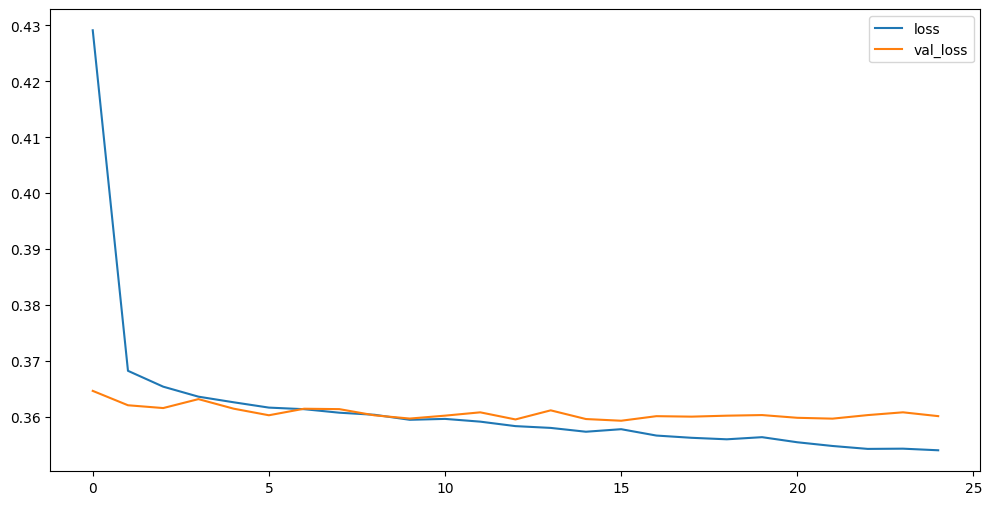

In [106]:
loss.plot(figsize=(12,6))
plt.savefig("plots/Loss_vs_ValLoss_of_ANN.png", dpi=300, bbox_inches='tight')

#### Random Forest Model

In [107]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV

In [108]:
rf=RandomForestClassifier(random_state=101)

In [109]:
param_grid = {
    'n_estimators': [100, 200],
    'max_depth': [None, 10, 20],
    'min_samples_split': [2, 5],
    'min_samples_leaf': [1, 2]
}

In [110]:
grid_search_rf = GridSearchCV(estimator=rf, param_grid=param_grid, 
                              scoring='f1', cv=3, verbose=2, n_jobs=-1)


In [111]:
grid_search_rf.fit(X_train, y_train)

Fitting 3 folds for each of 24 candidates, totalling 72 fits


GridSearchCV(cv=3, estimator=RandomForestClassifier(random_state=101),
             n_jobs=-1,
             param_grid={'max_depth': [None, 10, 20],
                         'min_samples_leaf': [1, 2],
                         'min_samples_split': [2, 5],
                         'n_estimators': [100, 200]},
             scoring='f1', verbose=2)

#### XGBoost Model

In [112]:
import xgboost as xgb
from xgboost import XGBClassifier

In [113]:
xgb = XGBClassifier(use_label_encoder=False, eval_metric='logloss')

In [114]:
param_grid = {
    'n_estimators': [100, 300],
    'learning_rate': [0.01, 0.1],
    'max_depth': [3, 6, 9],
    'min_child_weight': [1, 5],
    'subsample': [0.8, 1],
    'colsample_bytree': [0.8, 1],
}

In [115]:
xgb_grid = GridSearchCV(estimator=xgb, param_grid=param_grid,
                    scoring='f1', cv=3, verbose=1, n_jobs=-1)

In [116]:
xgb_grid.fit(X_train, y_train).fit(X_train, y_train)

Fitting 3 folds for each of 96 candidates, totalling 288 fits


c:\Users\User\AppData\Local\Programs\Python\Python312\Lib\site-packages\xgboost\training.py:183: UserWarning: [18:05:24] WARNING: C:\actions-runner\_work\xgboost\xgboost\src\learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)


Fitting 3 folds for each of 96 candidates, totalling 288 fits


c:\Users\User\AppData\Local\Programs\Python\Python312\Lib\site-packages\xgboost\training.py:183: UserWarning: [18:07:42] WARNING: C:\actions-runner\_work\xgboost\xgboost\src\learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)


GridSearchCV(cv=3,
             estimator=XGBClassifier(base_score=None, booster=None,
                                     callbacks=None, colsample_bylevel=None,
                                     colsample_bynode=None,
                                     colsample_bytree=None, device=None,
                                     early_stopping_rounds=None,
                                     enable_categorical=False,
                                     eval_metric='logloss', feature_types=None,
                                     feature_weights=None, gamma=None,
                                     grow_policy=None, importance_type=None,
                                     interaction_constraint...
                                     max_delta_step=None, max_depth=None,
                                     max_leaves=None, min_child_weight=None,
                                     missing=nan, monotone_constraints=None,
                                     multi_strategy=None, n_estimators=None,
                                     n_jobs=None, num_parallel_tree=None, ...),
             n_jobs=-1,
             param_grid={'colsample_bytree': [0.8, 1],
                         'learning_rate': [0.01, 0.1], 'max_depth': [3, 6, 9],
                         'min_child_weight': [1, 5], 'n_estimators': [100, 300],
                         'subsample': [0.8, 1]},
             scoring='f1', verbose=1)

# Section 6: Model Evaluation

We evaluate model performance using several metrics:

- **Confusion Matrix**: true positives, false positives, etc.
- **Accuracy**: overall correctness
- **Precision & Recall**: especially important with imbalanced data
- **F1 Score**: harmonic mean of precision and recall

In [117]:
from sklearn.metrics import classification_report,confusion_matrix

**For Ann Model**

In [118]:
ann_pred=model.predict(X_test)

971/971 ━━━━━━━━━━━━━━━━━━━━ 1s 530us/step


In [119]:
print(classification_report(y_test,ann_pred.round()))
print("\n")
print(confusion_matrix(y_test,ann_pred.round()))

              precision    recall  f1-score   support

           0       0.79      0.82      0.80     15656
           1       0.81      0.78      0.79     15388

    accuracy                           0.80     31044
   macro avg       0.80      0.80      0.80     31044
weighted avg       0.80      0.80      0.80     31044



[[12821  2835]
 [ 3448 11940]]


**For Random Forest Model**

In [120]:
rf_pred=grid_search_rf.predict(X_test)

In [121]:
print(classification_report(y_test,rf_pred.round()))
print("\n")
print(confusion_matrix(y_test,rf_pred.round()))

              precision    recall  f1-score   support

           0       0.81      0.77      0.79     15656
           1       0.78      0.82      0.80     15388

    accuracy                           0.80     31044
   macro avg       0.80      0.80      0.80     31044
weighted avg       0.80      0.80      0.80     31044



[[12115  3541]
 [ 2784 12604]]


**For XGBoost Model**

In [122]:
xgb_pred = xgb_grid.predict(X_test)

In [123]:
print(classification_report(y_test, xgb_pred))
print("\n")
print(confusion_matrix(y_test, xgb_pred))

              precision    recall  f1-score   support

           0       0.81      0.79      0.80     15656
           1       0.79      0.81      0.80     15388

    accuracy                           0.80     31044
   macro avg       0.80      0.80      0.80     31044
weighted avg       0.80      0.80      0.80     31044



[[12339  3317]
 [ 2857 12531]]


# Secrtion 7: Training/Testing with a Random Row

After training and evaluating our models on the test set, it's valuable to simulate how the model would behave in a real-world scenario.

In this section, we:
- Randomly select a sample from the original dataset (excluding the target).
- Feed the row into the trained model to get predictions.
- Compare the predicted labels with the actual `loan_status` values (if available).

This process helps validate that the model can generalize to individual, unseen cases — not just overall metrics.

In [124]:
import random

### Predicting 1

In [125]:
fully_paid_df=df[df['loan_repaid']==1]

In [126]:
random.seed(101)
random_ind_1 = random.randint(0,len(fully_paid_df))

new_customer_1 = fully_paid_df.drop('loan_repaid',axis=1).iloc[random_ind_1]
new_customer_1

loan_amnt           14400.0
term                     36
int_rate               9.17
installment          459.06
annual_inc          78000.0
                     ...   
48052                 False
70466                 False
86630                 False
93700                 False
earliest_cr_year       1998
Name: 265143, Length: 74, dtype: object

In [127]:
model.predict(new_customer_1.astype(float).values.reshape(1, -1))

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 44ms/step


array([[1.]], dtype=float32)

In [128]:
grid_search_rf.predict(new_customer_1.astype(float).values.reshape(1, -1))

array([1])

In [129]:
xgb_grid.predict(new_customer_1.astype(float).values.reshape(1, -1))

array([1])

**Now lets check whether the perosn paid his loan or no**

In [130]:
fully_paid_df.iloc[random_ind_1]['loan_repaid']

np.int64(1)

In [131]:
#All are 1, so the models are correct in predicting that this customer will repay the loan.

### Predicting 0

In [132]:
charged_off_df=df[df['loan_repaid']==0]

In [133]:
random.seed()
random_ind_0 = random.randint(0,len(charged_off_df))

new_customer_0 = charged_off_df.drop('loan_repaid',axis=1).iloc[random_ind_0]
new_customer_0

loan_amnt           21000.0
term                     60
int_rate               18.2
installment          535.55
annual_inc          97000.0
                     ...   
48052                 False
70466                 False
86630                 False
93700                 False
earliest_cr_year       2002
Name: 134021, Length: 74, dtype: object

In [134]:
model.predict(new_customer_0.astype(float).values.reshape(1, -1))

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 44ms/step


array([[1.]], dtype=float32)

In [135]:
grid_search_rf.predict(new_customer_0.astype(float).values.reshape(1, -1))

array([0])

In [136]:
xgb_grid.predict(new_customer_0.astype(float).values.reshape(1, -1))

array([0])

**Now lets check whether the perosn paid his loan or no**

In [137]:
charged_off_df.iloc[random_ind_0]['loan_repaid']

np.int64(0)

In [138]:
#Oops here we have a problem with the inbalance class 0, only XGBoost predicted it correctly.

# Secrtion 8: Saving Models

After training and validating the models, we save them for future inference.

Tools used:
- `joblib` for scikit-learn models
- `.h5` format for Keras models 

In [139]:
import joblib

In [142]:
model.save('models/ann_model.h5')  
joblib.dump(grid_search_rf, 'models/rf_model.pkl')
joblib.dump(xgb_grid, 'models/xgb_model.pkl')

['models/xgb_model.pkl']

# THANK YOU!!